The project concerns Time-Series Forecasting. The aim of the project is to predict the stock price of the selected company using a forecasting ARIMA model (AutoRegressive Integrated Moving Average). <br>
The NVIDIA stock price was analyzed in the project since 2015.<br>
Based on data downloaded from the website finance.yahoo.com.

### Load library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


### Upload data

In [2]:
df = pd.read_csv("NVDA.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.374790,2842000
1,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.047548,4948800
2,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.470057,4944100
3,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.421932,8045200
4,2015-01-08,19.360001,19.980000,19.350000,19.860001,19.114916,7094500


### Initial data analysis

In [3]:
#Type of atrributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1583 non-null   object 
 1   Open       1583 non-null   float64
 2   High       1583 non-null   float64
 3   Low        1583 non-null   float64
 4   Close      1583 non-null   float64
 5   Adj Close  1583 non-null   float64
 6   Volume     1583 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 86.7+ KB


In [4]:
#Check data NaN
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.notnull().sum()

Date         1583
Open         1583
High         1583
Low          1583
Close        1583
Adj Close    1583
Volume       1583
dtype: int64

In [6]:
#Check duplicates
df.duplicated().sum()

0

In [7]:
#Statistical indicators
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1.583000e+03
mean,188.771927,191.773386,185.518111,188.783323,187.913193,1.201784e+07
std,152.840415,155.290531,150.006767,152.758800,152.919462,7.239125e+06
min,19.250000,19.500000,18.940001,19.139999,18.421932,1.311200e+06
25%,56.289999,56.974998,55.690000,56.185000,55.317606,7.461150e+06
50%,166.169998,168.169998,163.580002,165.559998,164.319916,1.006880e+07
75%,247.769996,250.750000,243.819999,247.430001,245.807083,1.455370e+07
max,642.119995,648.570007,634.609985,645.489990,645.489990,9.232320e+07


### Verification of cross-correlation in the data

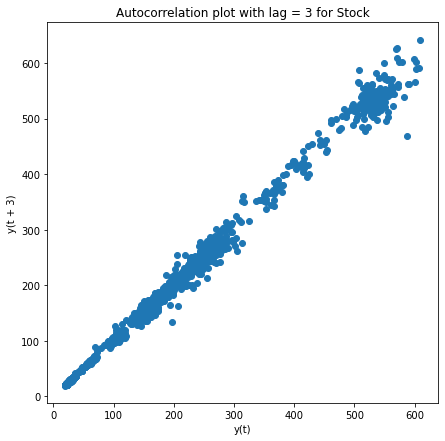

In [8]:
plt.figure(figsize=(7, 7))
lag_plot(df['Open'], lag=3)
plt.title('Autocorrelation plot with lag = 3 for Stock')
plt.show()

There is auto-correlation in the data so the ARIMA model is good for this data

### Plot the stock price

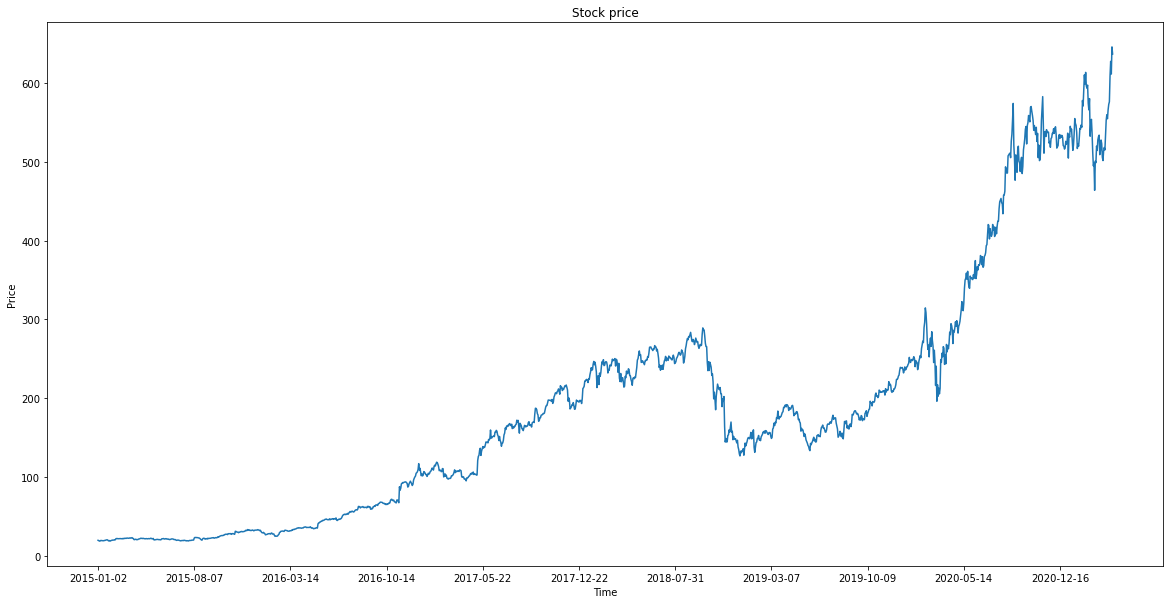

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0, 1583, 150), df['Date'][0:1583:150])
plt.title("Stock price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

### Division of the set into train and test

In [11]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]

train = train_data['Close'].values
test = test_data['Close'].values

### Build the model

In [12]:
history = [x for x in train]
prediction = []
n = len(test)

for time in range(n):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    true_test = test[time]
    history.append(true_test);
    
    
MSE_error = mean_squared_error(test, prediction);
print('Testing Mean Squared Error: {}'.format(MSE_error));


Testing Mean Squared Error: 130.05727311335585


### Results

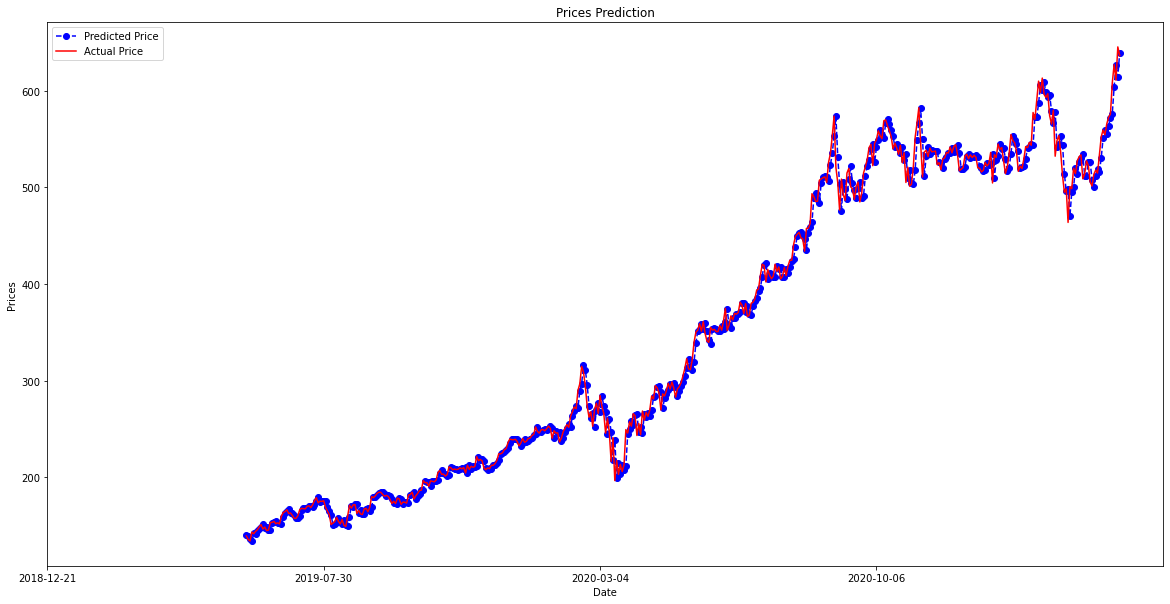

In [19]:
test_set_range = df[int(len(df)*0.7):].index

plt.figure(figsize=(20, 10))

plt.plot(test_set_range, prediction, color='blue', marker='o', 
         linestyle='dashed',label='Predicted Price')

plt.plot(test_set_range, test, color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1000,1583, 150), df.Date[1000:1583:150])
plt.legend()
plt.show()

In [22]:
test_set_range

RangeIndex(start=1108, stop=1583, step=1)

In [16]:
test

array([139.110001, 135.460007, 133.779999, 143.      , 141.279999,
       143.779999, 145.5     , 148.429993, 150.75    , 146.199997,
       148.259995, 144.639999, 145.029999, 152.880005, 153.119995,
       154.100006, 151.759995, 152.660004, 151.479996, 159.259995,
       163.229996, 164.229996, 166.169998, 162.229996, 162.75    ,
       160.229996, 157.210007, 157.309998, 160.059998, 166.279999,
       167.610001, 167.270004, 167.080002, 169.710007, 170.179993,
       168.440002, 171.320007, 175.660004, 178.660004, 173.380005,
       175.070007, 174.820007, 175.449997, 168.720001, 164.919998,
       161.190002, 150.789993, 152.350006, 153.889999, 158.259995,
       154.179993, 151.449997, 156.050003, 150.070007, 148.770004,
       159.559998, 170.779999, 167.869995, 171.229996, 171.479996,
       162.440002, 165.449997, 161.800003, 161.220001, 167.      ,
       167.509995, 164.169998, 168.759995, 179.740005, 178.649994,
       180.5     , 183.179993, 184.330002, 184.270004, 181.940